<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme du lagrangien augmenté </h1>
</center>

## Implémentation

1. Implémenter l'algorithme du lagrangien augmenté, en utilisant les différentes méthodes
qui ont été vues en première partie pour la résolution de la suite de problèmes sans
contraintes (fichier `src/lagrangien_augmente.jl`). La spécification est donnée dans le fichier.
2. Vérifier que les tests ci-dessous passent.
 

In [19]:
include("../src/lagrangien_augmente.jl")
include("../test/tester_lagrangien_augmente.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_lagrangien_augmente(lagrangien_augmente, afficher);

Affichage des résultats des algorithmes : false

Test Summary:         | Pass  Total  Time
Lagrangien augmenté   |   12     12  1.6s


## Interprétation

 1. Commenter les résultats obtenus, en étudiant notamment les valeurs en sortie de $\lambda_k$ et $\mu_k$.
 2. Étudier l'influence du paramètre $\tau$ dans la performance de l'algorithme. Pour cela Vous réaliserez des tests numériques.

## Réponses

1. On remarque que la valeur finale de $\lambda_k$ ne dépend que de la fonction. De plus, plus le nombre d'itérations est grand, plus $\mu_k$ est élevé, ce qui semble cohérent puisque $\mu_k$ est un paramètre de pénalité dans cet algorithme. 

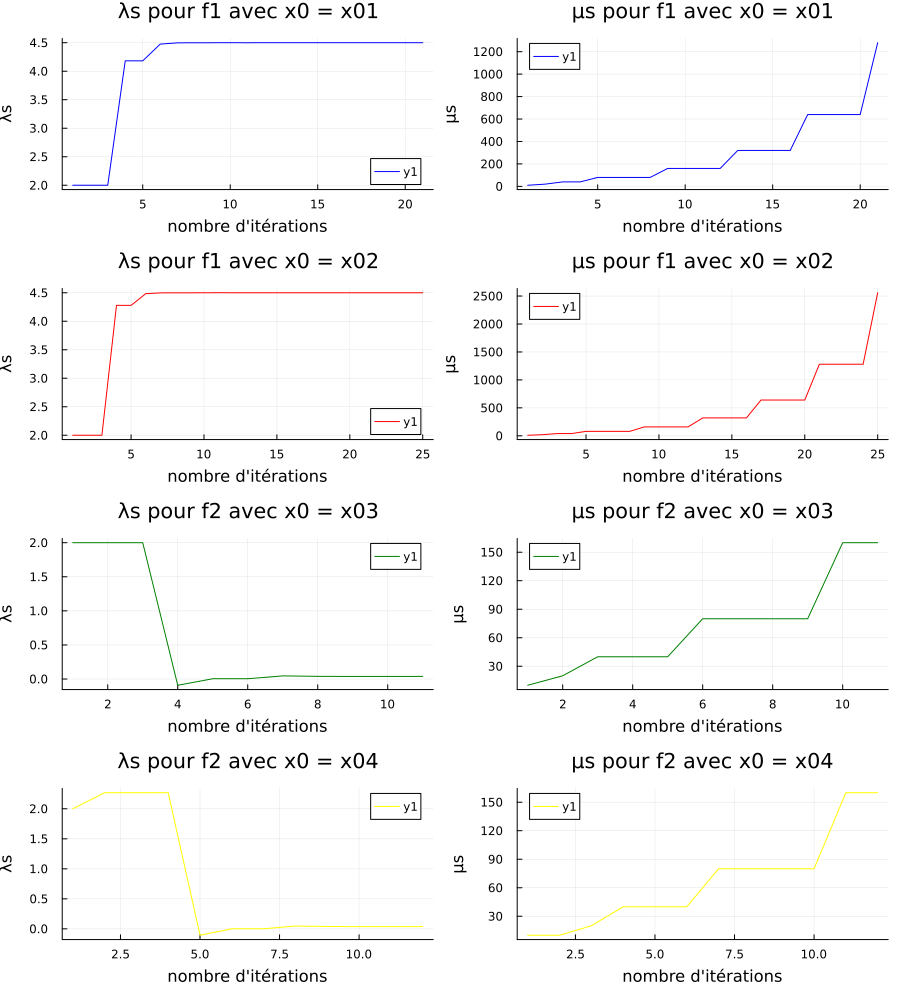

In [20]:
# Expérimentations numériques à faire ici.
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots
include("../src/lagrangien_augmente.jl")
include("../test/fonctions_de_tests.jl")

using Plots
tol = 1e-5
f1 = fct1; gf1 = grad_fct1; Hf1 = hess_fct1; c1 = contrainte1; gc1 = grad_contrainte1; Hc1 = hess_contrainte1
f2 = fct2; gf2 = grad_fct2; Hf2 = hess_fct2; c2 = contrainte2; gc2 = grad_contrainte2; Hc2 = hess_contrainte2

x0 = x01
x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(f1, gf1, Hf1, c1, gc1, Hc1, x0, tol_abs=tol, tol_rel=tol, algo_noc="rc-cauchy")
p1 = plot(λs, title="λs pour f1 avec x0 = x01", xlabel="nombre d'itérations", ylabel="λs", color="blue")
p2 = plot(μs, title="μs pour f1 avec x0 = x01", xlabel="nombre d'itérations", ylabel="μs", color="blue")

x0 = x02
x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(f1, gf1, Hf1, c1, gc1, Hc1, x0, tol_abs=tol, tol_rel=tol, algo_noc="rc-cauchy")
p3 = plot(λs, title="λs pour f1 avec x0 = x02", xlabel="nombre d'itérations", ylabel="λs", color="red")
p4 = plot(μs, title="μs pour f1 avec x0 = x02", xlabel="nombre d'itérations", ylabel="μs", color="red")

x0 = x03
x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(f2, gf2, Hf2, c2, gc2, Hc2, x0, tol_abs=tol, tol_rel=tol, algo_noc="rc-cauchy")
p5 = plot(λs, title="λs pour f2 avec x0 = x03", xlabel="nombre d'itérations", ylabel="λs", color="green")
p6 = plot(μs, title="μs pour f2 avec x0 = x03", xlabel="nombre d'itérations", ylabel="μs", color="green")

x0 = x04
x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(f2, gf2, Hf2, c2, gc2, Hc2, x0, tol_abs=tol, tol_rel=tol, algo_noc="rc-cauchy")
p7 = plot(λs, title="λs pour f2 avec x0 = x04", xlabel="nombre d'itérations", ylabel="λs", color="yellow")
p8 = plot(μs, title="μs pour f2 avec x0 = x04", xlabel="nombre d'itérations", ylabel="μs", color="yellow")

plot(p1, p2, p3, p4, p5, p6, p7, p8, layout=(4,2), size=(900,1000))


2. Lorsque 𝜏 est faible, le nombre d'itérations est plutôt élevé. Plus $\tau$ augmente, plus le nombre d'itérations diminue. Ceci semble cohérent puisque $\tau$ influe directement sur le paramètre de pénalité $\mu_k$. En effet, plus $\tau$ est élevé, plus la pénalisation de $\mu_k$ sera forte et l'algorithme convergera donc plus rapidement.

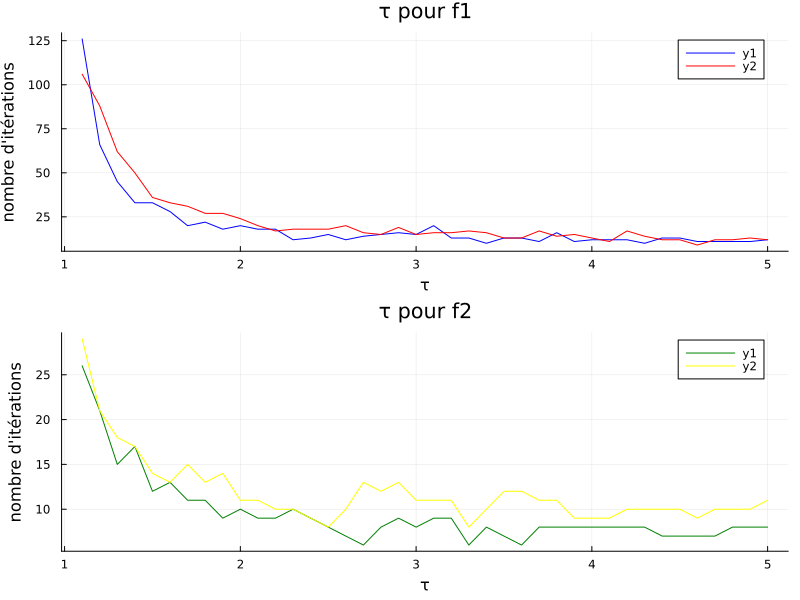

In [21]:
include("../src/lagrangien_augmente.jl")
include("../test/fonctions_de_tests.jl")

using Plots
tol = 1e-5
f1 = fct1; gf1 = grad_fct1; Hf1 = hess_fct1; c1 = contrainte1; gc1 = grad_contrainte1; Hc1 = hess_contrainte1
f2 = fct2; gf2 = grad_fct2; Hf2 = hess_fct2; c2 = contrainte2; gc2 = grad_contrainte2; Hc2 = hess_contrainte2
l_tau = 1.1:0.1:5
l1 = []; l2 = []; l3 = []; l4 = []

for tau in l_tau
    x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(f1, gf1, Hf1, c1, gc1, Hc1, x01, tol_abs=tol, tol_rel=tol, algo_noc="rc-cauchy", τ=tau)
    l1 = vcat(l1,[nb_iters])
    x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(f1, gf1, Hf1, c1, gc1, Hc1, x02, tol_abs=tol, tol_rel=tol, algo_noc="rc-cauchy", τ=tau)
    l2 = vcat(l2,[nb_iters])
    x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(f2, gf2, Hf2, c2, gc2, Hc2, x03, tol_abs=tol, tol_rel=tol, algo_noc="rc-cauchy", τ=tau)
    l3 = vcat(l3,[nb_iters])
    x_sol, f_sol, flag, nb_iters, μs, λs = lagrangien_augmente(f2, gf2, Hf2, c2, gc2, Hc2, x04, tol_abs=tol, tol_rel=tol, algo_noc="rc-cauchy", τ=tau)
    l4 = vcat(l4,[nb_iters])
end

p1 = plot(l_tau,l1,title="τ pour f1",xlabel="τ",ylabel="nombre d'itérations",color="blue")
p1 = plot!(l_tau,l2,color="red")
p2 = plot(l_tau,l3,title="τ pour f2",xlabel="τ",ylabel="nombre d'itérations",color="green")
p2 = plot!(l_tau,l4,color="yellow")
plot(p1, p2, layout=(2,1), size=(800,600))